In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Cricket.csv",encoding="ISO-8859-1")
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15


In [4]:
df.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [6]:
#importing standard scaler
from sklearn.preprocessing import StandardScaler

In [7]:
#scaling
dfs=df[['Ave','SR']]

scaler=StandardScaler()
df_scaled=scaler.fit_transform(dfs)
df_scaled

array([[ 1.07229395,  0.70315153],
       [ 0.58772461, -0.0441395 ],
       [ 0.59622582,  0.1109969 ],
       [-1.04790945,  1.20709133],
       [-0.87618487, -0.03399986],
       [ 0.16946476, -0.51259058],
       [ 0.99238251, -0.64947564],
       [ 0.42450125, -0.56734461],
       [ 0.108256  , -0.8167796 ],
       [ 0.33268811,  0.02176813],
       [ 0.12695867,  0.70315153],
       [ 0.54181804, -0.42538973],
       [-0.44772356,  1.78910632],
       [ 2.17575185,  0.95258652],
       [-0.2725985 , -0.53489778],
       [ 2.5549061 ,  2.1247282 ],
       [-0.61604765,  0.1860302 ],
       [-0.20288853,  0.58958763],
       [ 0.11675721,  0.13938788],
       [ 0.52311536, -0.86747777],
       [-0.3355075 ,  0.84916225],
       [ 0.48400977, -1.64315977],
       [-0.16208269, -1.17369472],
       [ 0.14056062, -0.24287632],
       [-0.590544  ,  2.53842527],
       [ 2.62121559,  1.1857981 ],
       [-0.40691772,  0.4020044 ],
       [-2.5424233 ,  3.82311689],
       [-1.04110847,

In [8]:
df_scaled=pd.DataFrame(df_scaled)
df_scaled.columns=['Average','StrikeRate']
df_scaled.head()

,Average,StrikeRate
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


In [9]:
#Kmeans
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,max_iter=50,random_state=100)
kmeans.fit(df_scaled)

KMeans(max_iter=50, n_clusters=4, random_state=100)

In [10]:
kmeans.labels_

array([2, 0, 0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 1, 2, 3, 2, 3, 1, 0, 0, 1, 0,
       3, 0, 1, 2, 3, 1, 3, 0, 3, 3, 0, 3, 2, 3, 3, 0, 2, 0, 3, 3, 2, 3,
       3, 3, 0, 3, 3, 0, 1, 0, 3, 3, 3, 3, 0, 1, 3, 1, 3, 1, 0, 2, 2, 0,
       0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 3, 1, 3])

In [11]:
df['cluster']=kmeans.labels_
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,2
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,0
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,0
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,0
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,0
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,3
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1


In [12]:
df[df.cluster==3]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,3
14,M Azharuddin (INDIA),1985-2000,334,308,54,9378,153*,36.92,12669,74.02,7,58,9,3
16,PA de Silva (SL),1984-2003,308,296,30,9284,145,34.90,11443,81.13,11,64,17,3
22,MS Atapattu (SL),1990-2007,268,259,32,8529,132*,37.57,12594,67.72,11,59,13,3
26,HH Gibbs (SA),1996-2010,248,240,16,8094,175,36.13,9721,83.26,21,37,22,3
28,SP Fleming (ICC/NZ),1994-2007,280,269,21,8037,134*,32.40,11242,71.49,8,49,17,3
30,SR Waugh (AUS),1986-2002,325,288,58,7569,120*,32.90,9971,75.91,3,45,15,3
31,A Ranatunga (SL),1982-1999,269,255,47,7456,131*,35.84,9571,77.90,4,49,18,3
33,Younis Khan (PAK),2000-2015,265,255,23,7249,144,31.24,9628,75.29,7,48,22,3
35,Saleem Malik (PAK),1982-1999,283,256,38,7170,102,32.88,9383,76.41,5,47,19,3


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   79 non-null     object 
 1   Span     79 non-null     object 
 2   Mat      79 non-null     int64  
 3   Inns     79 non-null     int64  
 4   NO       79 non-null     int64  
 5   Runs     79 non-null     int64  
 6   HS       79 non-null     object 
 7   Ave      79 non-null     float64
 8   BF       79 non-null     int64  
 9   SR       79 non-null     float64
 10  100      79 non-null     int64  
 11  50       79 non-null     int64  
 12  0        79 non-null     int64  
 13  cluster  79 non-null     int32  
dtypes: float64(2), int32(1), int64(8), object(3)
memory usage: 8.5+ KB


In [14]:
df[(df.Ave==max(df.Ave)) | (df.SR==max(df.SR))]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster
25,V Kohli (INDIA),2008-2017,188,180,29,8146,183,53.94,8952,90.99,27,43,11,2
27,Shahid Afridi (Asia/ICC/PAK),1996-2015,398,369,27,8064,124,23.57,6892,117.00,6,39,30,1


<AxesSubplot:xlabel='cluster', ylabel='SR'>

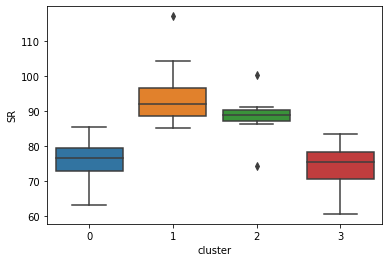

In [15]:
sns.boxplot(x='cluster', y='SR', data=df)

<AxesSubplot:xlabel='cluster', ylabel='Ave'>

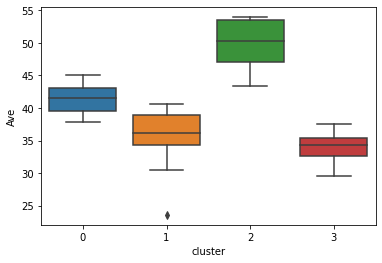

In [16]:
sns.boxplot(x='cluster', y='Ave', data=df)

In [17]:
df_scaled['cluster']=kmeans.labels_
df_scaled

,Average,StrikeRate,cluster
0,1.072294,0.703152,2
1,0.587725,-0.044139,0
2,0.596226,0.110997,0
3,-1.047909,1.207091,1
4,-0.876185,-0.034000,3
...,...,...,...
74,1.106299,-1.457604,0
75,0.829159,-0.562275,0
76,-0.537836,-0.234765,3
77,0.208570,1.332823,1


<AxesSubplot:xlabel='cluster', ylabel='Average'>

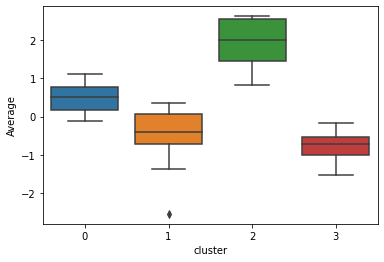

In [18]:
sns.boxplot(x='cluster', y='Average', data=df_scaled)

<AxesSubplot:xlabel='cluster', ylabel='StrikeRate'>

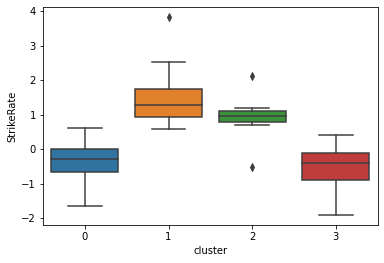

In [19]:
sns.boxplot(x='cluster', y='StrikeRate', data=df_scaled)

## Hierarchical Clustering

In [20]:
#importing libraries for Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import linkage

In [21]:
df_scaled1=df_scaled[['Average','StrikeRate']]
df_scaled1

,Average,StrikeRate
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000
...,...,...
74,1.106299,-1.457604
75,0.829159,-0.562275
76,-0.537836,-0.234765
77,0.208570,1.332823


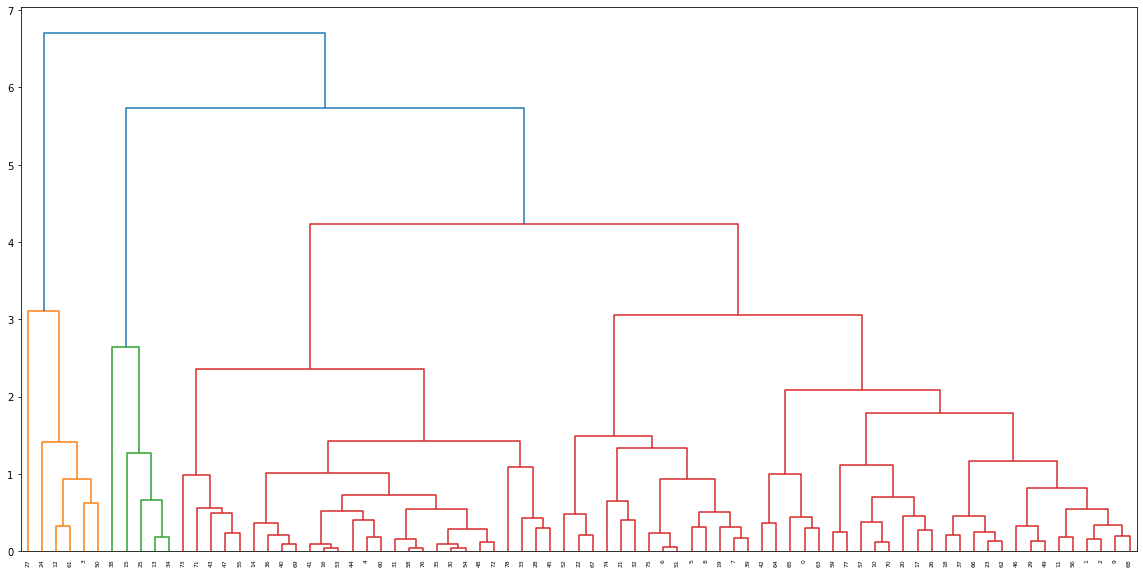

In [26]:
plt.figure(figsize=([20,10]))
mergings=linkage(df_scaled1,method='complete',metric='euclidean') #By default metric is Euclidean
dendrogram(mergings)
plt.show()

In [29]:
cluster_labels=cut_tree(mergings,n_clusters=4).reshape(-1,)
cluster_labels

array([0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 3, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 3, 0, 1, 2, 0, 2, 2, 0, 2, 3, 2, 2, 0, 3, 0, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2])

In [30]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
clusterCut

0     0
1     0
2     0
3     1
4     2
     ..
74    0
75    0
76    2
77    0
78    2
Length: 79, dtype: int32

In [31]:
df_scaled1['cluster_id']=cluster_labels
df_scaled1.head()

,Average,StrikeRate,cluster_id
0,1.072294,0.703152,0
1,0.587725,-0.044139,0
2,0.596226,0.110997,0
3,-1.047909,1.207091,1
4,-0.876185,-0.034000,2


In [32]:
df['cluster_id']=cluster_labels
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster,cluster_id
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,2,0
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,0,0
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,0,0
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1,1
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,0,0
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,0,0
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,3,2
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1,0


In [33]:
df[df.cluster_id==0]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster,cluster_id
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,2,0
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,0,0
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,0,0
5,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,0,0
6,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17,0,0
7,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.70,22,72,16,0,0
8,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13,0,0
9,BC Lara (ICC/WI),1990-2007,299,289,32,10405,169,40.48,13086,79.51,19,63,16,0,0
10,TM Dilshan (SL),1999-2016,330,303,41,10290,161*,39.27,11933,86.23,22,47,11,1,0
11,Mohammad Yousuf (Asia/PAK),1998-2010,288,273,40,9720,141*,41.71,12942,75.10,15,64,15,0,0
